
# Project: Investigate a Dataset (TMDB movies dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.The data also contains informations like popularity, cast, runtime, genres etc.

Based on this data, the following questions will be answered in this project:

1. Which genres of movies are most frequent overall?
2. Which are the top ten directors with more than six movies in terms of average rating?
3. Is there a positive correlation between "popularity" and "vote_average"?
4. What is the year-by-year trend of movie profits?
5. Which month has the highest average revenue?

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, i will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

### General Properties

In [2]:
# Load the data and print out a few lines. Perform operations to inspect data types 
# and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")

In [3]:
# view dataset
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In a quick glance at the data, we can see the values in the cast, genres and production_companies columns, each of which contains multiple values separated by the "|".


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The info() function allows us to view information about the data, and we can see that some data are missing, such as columns cast, homepage, director, tagline and some data types also need to be improved.

### Data Cleaning
After discussing the structure of the data and any problems that need to be
cleaned, perform those cleaning steps in the second part of this section.

1. First I will delete the columns that are not relevant to the issues discussed in this project.
2. Then I will check if there are null values and delete those rows. I will also check if there are any values of 0 in the budget_adj and revenue_adj columns.
3. Then I will see if there is a duplicate item and delete it.
4. Finally I will fix some column types.

#### Drop Extraneous Columns

In [6]:
# Some columns are not used in my project, so I will remove them.
# drop columns from dataset
df.drop(["id","imdb_id","cast","homepage","tagline","keywords","overview","production_companies","vote_count"], axis=1, inplace=True)

In [7]:
# confirm changes
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09


#### Drop Rows with Missing Values

In [8]:
# view missing value count for each feature
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [9]:
# drop rows with any null values in dataset
df.dropna(inplace=True)

In [10]:
# checks if any of columns in dataset have null values - should print False
df.isnull().sum().any()

False

#### Drop Rows with 0 Values

In [11]:
#statistical details about "budget_adj" and "revenue_adj" columns
df[['budget_adj','revenue_adj']].describe()

,budget_adj,revenue_adj
count,1.080100e+04,1.080100e+04
mean,1.765551e+07,5.167244e+07
std,3.438265e+07,1.450123e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,2.103337e+07,3.408478e+07
max,4.250000e+08,2.827124e+09


In [12]:
# check if there is any data where the values of the "budget_adj" and "revenue_adj" columns are both zero
df[(df['revenue_adj'] == 0) | (df['budget_adj']== 0)].shape

(6947, 12)

In [13]:
# drop the data where the values of the "budget_adj" and "revenue_adj" columns are both zero
df.drop(df[(df['revenue_adj'] == 0) | (df['budget_adj']== 0)].index,inplace=True)

In [14]:
# check if there any data where the values of the "budget_adj" and "revenue_adj" columns are both zero
df[(df['revenue_adj'] == 0) | (df['budget_adj']== 0)].shape

(0, 12)

#### Dedupe Data

In [15]:
#caculating the number of duplicate rows
df.duplicated( ).sum()

1

In [16]:
#dropping the duplicate rows
df.drop_duplicates(inplace=True)

In [17]:
# print number of duplicates again to confirm dedupe - should be 0
df.duplicated().sum()

0

#### Fix Data types

In [18]:
# convert budget_adj and revenue_adj columns to int
df['budget_adj']=df['budget_adj'].astype(int)
df['revenue_adj']=df['revenue_adj'].astype(int)
df['release_date'] = pd.to_datetime(df['release_date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3853 non-null   float64       
 1   budget          3853 non-null   int64         
 2   revenue         3853 non-null   int64         
 3   original_title  3853 non-null   object        
 4   director        3853 non-null   object        
 5   runtime         3853 non-null   int64         
 6   genres          3853 non-null   object        
 7   release_date    3853 non-null   datetime64[ns]
 8   vote_average    3853 non-null   float64       
 9   release_year    3853 non-null   int64         
 10  budget_adj      3853 non-null   int32         
 11  revenue_adj     3853 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(4), object(3)
memory usage: 361.2+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which genres of movies are most frequent overall?)
In this part I will count the number of appearances of each type in the genres column.


In [20]:
# create one copy of the dataframe
df_genre = df.copy()

# merge all the rows of the genres column with the 
# cat function (the concatenated objects are characters "|"), 
# then split them with the split function, and create a Series
genre_total = pd.Series(df_genre['genres'].str.cat(sep = "|").split("|"))

In [21]:
# count the number of appearances of genre
movie_genre = genre_total.value_counts()

In [22]:
movie_genre

Drama              1755
Comedy             1357
Thriller           1204
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              12
TV Movie              1
dtype: int64

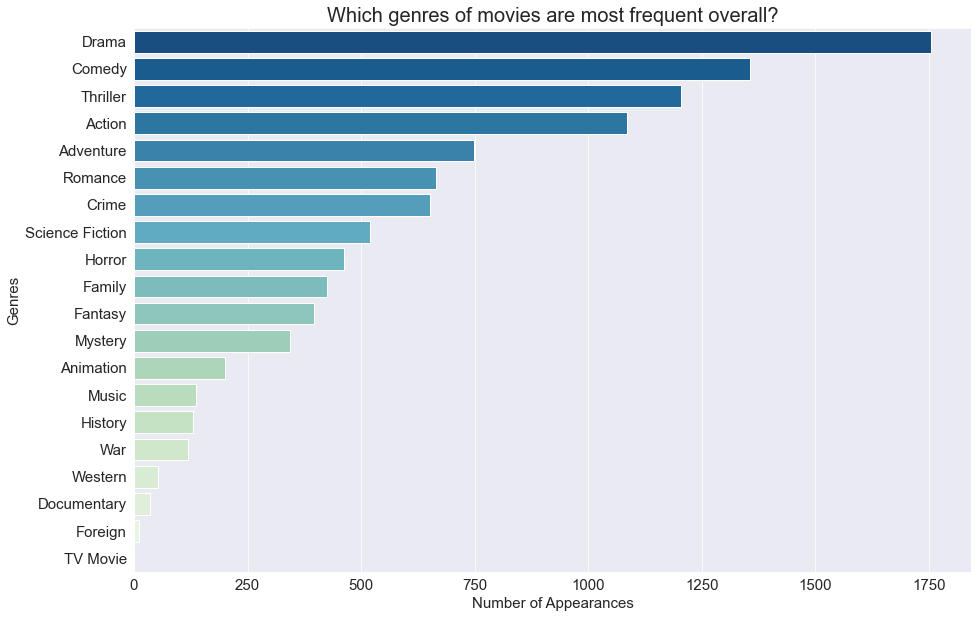

In [23]:
plt.figure(figsize=(15, 10))
sns.set_style("darkgrid")
gen = sns.barplot(x= movie_genre, y= movie_genre.index,orient= "h",palette="GnBu_r")
gen.set_title("Which genres of movies are most frequent overall?",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
gen.set_xlabel("Number of Appearances",fontsize=15)
gen.set_ylabel("Genres",fontsize=15);

### Research Question 2  (Which are the top ten directors with highest average movie ratings?)
In this section I will calculate the average movie rating of directors who have produced more than 6 films and find the top 10 directors.

The average movie rating will be calculated by calculating the average of each director's film's "vote_average".

1. In the first step I will find out the directors who have produced more than 6 movies.
2. Then I will use the groupby() function to calculate the average rating of each director's movies.
3. In the third step I will use the join() function to get the average rating of directors who have produced more than 6 movies.
4. Then I will use the sort_values() function to sort the average rating and select the top 10.

In [24]:
# create one copy of the dataframe
df_director = df.copy()

# counting the number of films made by each director
counts = df_director["director"].value_counts()

# make a DataFrame of directors who have made more than six films
diectors_6 = pd.DataFrame(counts[counts > 6])
diectors_6.rename(columns={"director":"film_counts"},inplace=True)

# view dataset
diectors_6.head(5)

,film_counts
Steven Spielberg,27
Clint Eastwood,24
Ridley Scott,21
Woody Allen,18
Steven Soderbergh,17


In [25]:
# calculate the average of the "vote_average" of each director
vote_mean = pd.DataFrame(df_director.groupby("director")["vote_average"].mean())
vote_mean.rename(columns={"vote_average":"vote_average_mean"},inplace=True)
# view dataset
vote_mean.head(5)

,vote_average_mean
director,
FrÃ©dÃ©ric Jardin,5.9
A.R. Murugadoss,6.9
Aaron Blaise|Robert Walker,6.8
Aaron Norris,4.7
Aaron Seltzer|Jason Friedberg,3.9


In [26]:
#default left join
result = diectors_6.join(vote_mean)
# Sorted by the value of "vote_average_mean"
result.sort_values("vote_average_mean",ascending=False,inplace=True)
result["vote_average_mean"]=result["vote_average_mean"].round(2) 

In [27]:
# select top ten directors with more than five films in terms of average rating
result_10 = result.iloc[0:9]
# Add the number of movies the director has made into the index.
result_10.index = result_10.index +"("+result_10["film_counts"].apply(str)+")"

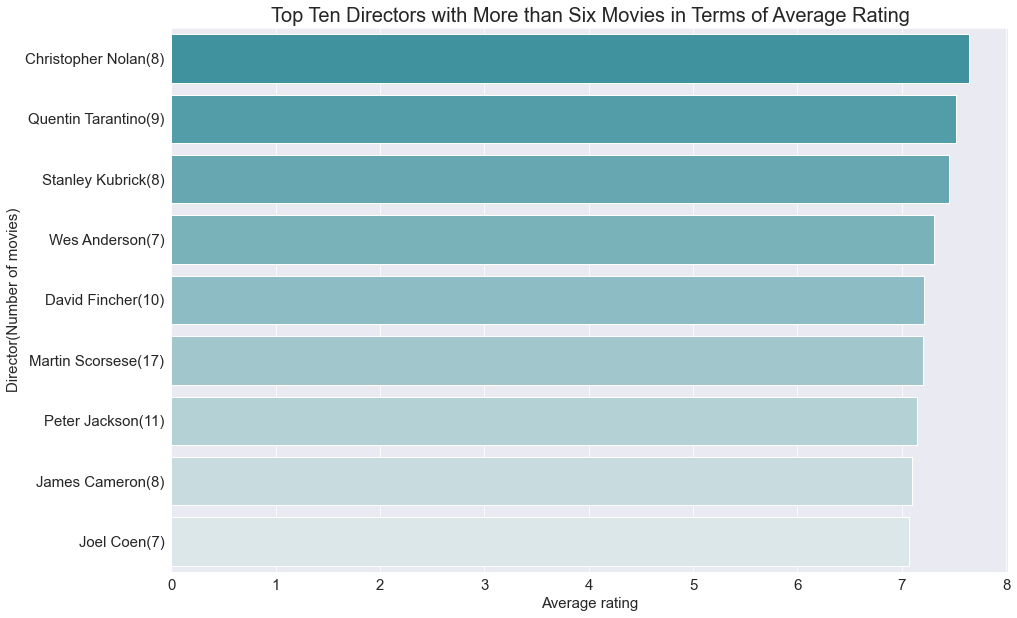

In [28]:
plt.figure(figsize=(15, 10))
sns.set_style("darkgrid")
color_1=sns.light_palette((210, 90, 60), input="husl",n_colors=10,reverse=True)
di = sns.barplot(x= result_10.vote_average_mean, y= result_10.index, orient= "h",palette=color_1)
di.set_title("Top Ten Directors with More than Six Movies in Terms of Average Rating",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
di.set_xlabel("Average rating",fontsize=15)
di.set_ylabel("Director(Number of movies)",fontsize=15);

### Research Question 3  (Is there a positive correlation between "popularity" and "vote_average"?)
In this section I will check whether there is a positive correlation between the Popularity and vote columns in the data.

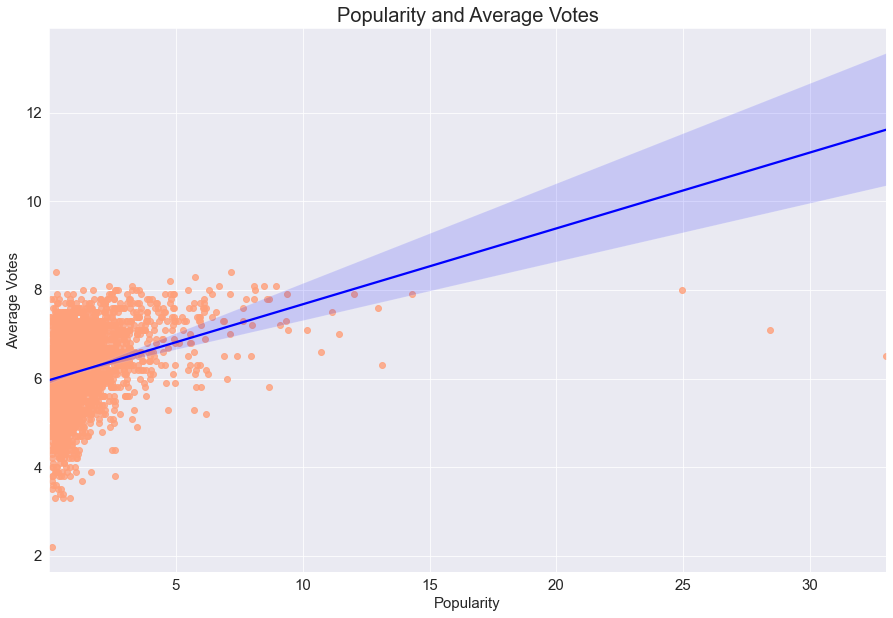

In [29]:

plt.figure(figsize=(15, 10))
sns.set_style("darkgrid")
p_vote = sns.regplot(x=df["popularity"],y=df["vote_average"],scatter_kws={"color": "lightsalmon"}, line_kws={"color": "blue"})
p_vote.set_title("Popularity and Average Votes",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
p_vote.set_xlabel("Popularity",fontsize=15)
p_vote.set_ylabel("Average Votes",fontsize=15);


In [30]:
print("Correlation Between Popularity And Profit : ",df.corr().loc["popularity","vote_average"])

Correlation Between Popularity And Profit :  0.31781058868995554


### Research Question 4  (What is the year-by-year trend of movie profits?)
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In this section, I will calculate the average profit of the top 5 highest-profits movies each year. And use this as a benchmark to see the trend of movie earnings.

1. In the first step, I will create a profit column.The profit will calculated with the following formula : profit = revenue_adj - budget_adj
2. Then I will use the groupby() function to group the movies by their release year and use the sort_values() function to sort the profit column.
3. Based on the ranking, I will select the top five movies in terms of profit per year and calculate the average profit per year.


In [31]:
# create one copy of the dataframe
df_profit = df.copy()

df_profit['profit'] = df_profit['revenue_adj'] - df_profit['budget_adj']
df_profit.head(5)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,137999939,1392445892,1254445953
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,137999939,348161292,210161353
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015,101199955,271619025,170419070
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015,183999919,1902723129,1718723210
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,7.3,2015,174799923,1385748801,1210948878


In [32]:
df_year_profit = df_profit.groupby('release_year').apply(lambda x: x.sort_values('profit', ascending=False)[0:5])

# Since an index with the same name as "release_year" will be generated here, 
# which will have an impact on our later calculations, 
# so I changed the name of the "release_year" column in the original list to "year".
df_year_profit.rename(columns={"release_year":"year"},inplace=True)

In [33]:
df_year_profit.head(10)

popularity    budget    revenue  \
release_year                                          
1960         10143    1.136943  12000000   60000000   
             10141    2.610362    806948   32000000   
             10144    0.947307   3000000   25000000   
             10170    0.055821   3000000    7100000   
             10142    1.872132   2000000    4905000   
1961         10110    2.631987   4000000  215880014   
             10112    0.900245   6000000   43656822   
             10113    0.754548   6000000   28900000   
             10121    0.282665   5037000   14483352   
             10115    0.538364   3000000   10000000   

                                    original_title  \
release_year                                         
1960         10143                       Spartacus   
             10141                          Psycho   
             10144                   The Apartment   
             10170                     Cinderfella   
             10142           The Magnificent Seven   
1961         10110  One Hundred and One Dalmatians   
             10112                 West Side Story   
             10113            The Guns of Navarone   
             10121                   King of Kings   
             10115           Judgment at Nuremberg   

                                                             director  \
release_year                                                            
1960         10143                                    Stanley Kubrick   
             10141                                   Alfred Hitchcock   
             10144                                       Billy Wilder   
             10170                                      Frank Tashlin   
             10142                                       John Sturges   
1961         10110  Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman   
             10112                         Jerome Robbins|Robert Wise   
             10113              J. Lee Thompson|Alexander Mackendrick   
             10121                                       Nicholas Ray   
             10115                                     Stanley Kramer   

                    runtime                             genres release_date  \
release_year                                                                  
1960         10143      197               Action|Drama|History   2060-10-06   
             10141      109              Drama|Horror|Thriller   2060-08-14   
             10144      125               Comedy|Drama|Romance   2060-06-15   
             10170       91                     Comedy|Romance   2060-12-18   
             10142      128           Action|Adventure|Western   2060-10-23   
1961         10110       79  Adventure|Animation|Comedy|Family   2061-01-25   
             10112      152                  Music|Crime|Drama   2061-10-18   
             10113      158         Action|Adventure|Drama|War   2061-04-27   
             10121      168                              Drama   2061-10-11   
             10115      186                      Drama|History   2061-12-01   

                    vote_average  year  budget_adj  revenue_adj      profit  
release_year                                                                 
1960         10143           6.9  1960    88475609    442378047   353902438  
             10141           8.0  1960     5949601    235934958   229985357  
             10144           7.9  1960    22118902    184324186   162205284  
             10170           7.2  1960    22118902     52348068    30229166  
             10142           7.0  1960    14745934     36164405    21418471  
1961         10110           6.6  1961    29179444   1574814739  1545635295  
             10112           6.6  1961    43769167    318470457   274701290  
             10113           7.0  1961    43769167    210821488   167052321  
             10121           5.9  1961    36744215    105654042    68909827  
             10115        

In [34]:
df_m = df_year_profit.groupby('release_year')["profit"].mean()

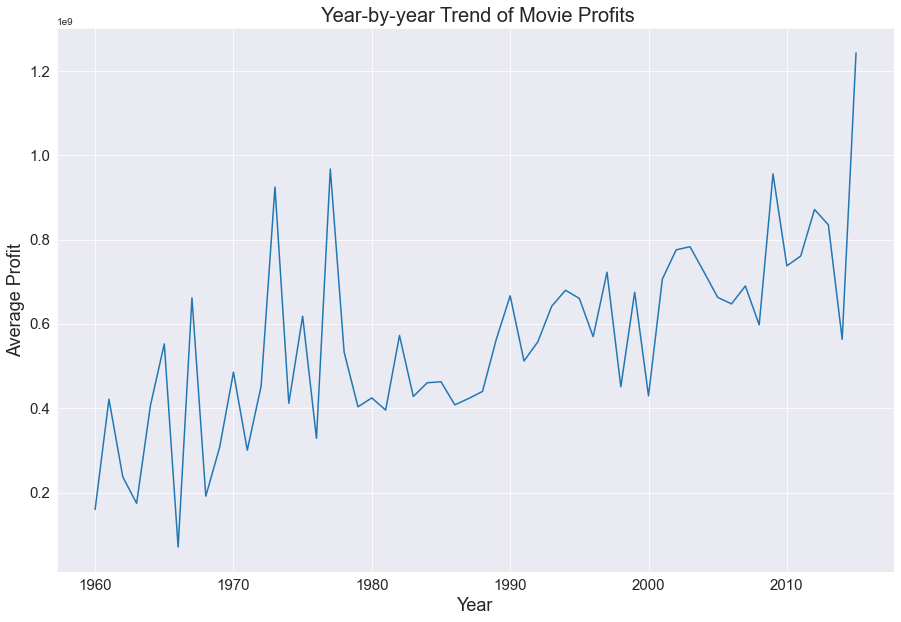

In [35]:

plt.figure(figsize=(15, 10))
sns.set_style("darkgrid")
p_y = sns.lineplot(x= df_m.index, y= df_m, markers="o")
p_y.set_title(" Year-by-year Trend of Movie Profits",fontsize=20)
p_y.set_xlabel("Year",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
p_y.set_ylabel("Average Profit",fontsize=18);

### Research Question 5  (Which month has the highest average revenue?)
In this part, I will calculate the average revenue of movies released in each month to find the month with the highest average revenue.
1. In the first step I will create a new month column
2. Then I will use the groupby function to calculate the average revenue for each month

In [36]:
# create one copy of the dataframe
df_month = df.copy()
# create a new column for the month
df_month['month'] = df_month['release_date'].apply(lambda x: x.month)

df_month.head(-5)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,month
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,137999939,1392445892,6
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,137999939,348161292,5
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015,101199955,271619025,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015,183999919,1902723129,12
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,7.3,2015,174799923,1385748801,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10779,0.411826,12000000,22765081,Convoy,Sam Peckinpah,110,Action|Comedy|Drama,1978-06-27,6.2,1978,40112408,76096852,6
10780,0.409377,3500000,24046533,Invasion of the Body Snatchers,Philip Kaufman,115,Horror|Thriller|Science Fiction|Mystery,1978-12-19,6.5,1978,11699452,80380362,12
10788,0.277769,24000000,21049053,The Wiz,Sidney Lumet,134,Adventure|Family|Fantasy|Music|Science Fiction,1978-10-24,6.1,1978,80224816,70360684,10
10791,0.236193,6800000,26518355,Damien: Omen II,Don Taylor|Mike Hodges,107,Action|Drama|Horror|Thriller,1978-06-09,6.1,1978,22730364,88642923,6


In [37]:
df_month_revenue = df_month.groupby("month")["revenue_adj"].mean()

In [38]:
df_month_revenue.sort_index()

month
1     7.146060e+07
2     8.332814e+07
3     1.148546e+08
4     1.110203e+08
5     2.047275e+08
6     2.304416e+08
7     1.752418e+08
8     8.918078e+07
9     6.330897e+07
10    1.012462e+08
11    1.693620e+08
12    1.677914e+08
Name: revenue_adj, dtype: float64

In [39]:
df_month_revenue.index = df_month_revenue.index.map(str)
df_month_revenue.index = df_month_revenue.index.map({'1':'January', '2':'February','3':'March','4':'April','5':'May','6':'June','7':'July','8':'August','9':'September','10':'October','11':'November','12':'December'})
df_month_revenue

month
January      7.146060e+07
February     8.332814e+07
March        1.148546e+08
April        1.110203e+08
May          2.047275e+08
June         2.304416e+08
July         1.752418e+08
August       8.918078e+07
September    6.330897e+07
October      1.012462e+08
November     1.693620e+08
December     1.677914e+08
Name: revenue_adj, dtype: float64

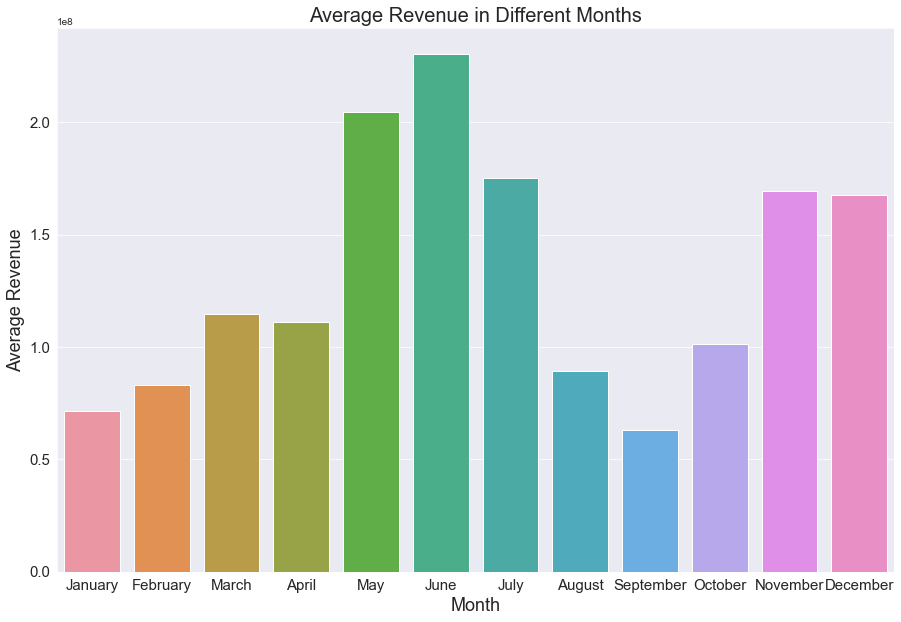

In [40]:
plt.figure(figsize=(15, 10))
sns.set_style("darkgrid")
sns.barplot(x=df_month_revenue.index,y=df_month_revenue)
plt.title("Average Revenue in Different Months",fontsize=20)
plt.xlabel("Month",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Average Revenue",fontsize=18);

<a id='conclusions'></a>
## Conclusions

1. we can see that "Drama", "Comedy", "Thriller" genres are the most frequent in the past few years.
2. The average rating of these top 10 directors' movies is very similar and all of them are over 7, among which Christopher Nolan's movies have the highest average rating. Among these directors Martin Scorsese has produced the most movies with 17.
3. The correlation coefficient takes values from -1 to 1. When close to 1, it indicates a strong positive correlation, when close to -1, when close to -1, it indicates a strong negative correlation, and if the value is close to 0, it indicates a very low correlation. Using the corr function, we calculate the correlation between popularity and profit is about 0.32, which indicates a very low correlation.
4. It can be seen that the average movie profit is showing a gradual increasing trend.
5. According to the average revenue of each month, it can be found that May, June have the highest.

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1